# Алгоритмы интеллектуальной обработки больших объемов данных
## Домашнее задание №2: Линейные модели


###### <hr\>
**Общая информация**

**Срок сдачи:** 09 ноября 18:00 Сдача **очная** на онлайн занятии. <br\>


Используйте данный Ipython Notebook при оформлении домашнего задания.

Присылать ДЗ необходимо в виде ссылки на свой github репозиторий на почту ml1.sphere@mail.ru с указанием темы в следующем формате:

[ML0920, Задание 2] Фамилия Имя.



**Штрафные баллы:**

1. Невыполнение PEP8 -1 балл
2. Отсутствие фамилии в имени скрипта (скрипт должен называться по аналогии со stroykova_hw2.ipynb) -1 балл
3. Все строчки должны быть выполнены. Нужно, чтобы output команды можно было увидеть уже в git'е. В противном случае -1 балл
4. При оформлении ДЗ нужно пользоваться данным файлом в качестве шаблона. Не нужно удалять и видоизменять написанный код и текст, если явно не указана такая возможность. В противном случае -1 балл
<hr\>

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (12,5)

Здравствуйте, уважаемые студенты! 

В этом задании мы будем реализовать линейные модели. Необходимо реализовать линейную и логистическую регрессии с L2 регуляризацией

# Теоретическое введение



Линейная регрессия решает задачу регрессии и оптимизирует функцию потерь MSE 

$$L(w) =  \frac{1}{N}\left[\sum_i (y_i - a_i) ^ 2 \right], $$ где $y_i$ $-$ целевая функция,  $a_i = a(x_i) =  \langle\,x_i,w\rangle ,$ $-$ предсказание алгоритма на объекте $x_i$, $w$ $-$ вектор весов (размерности $D$), $x_i$ $-$ вектор признаков (такой же размерности $D$).

Не забываем, что здесь и далее  мы считаем, что в $x_i$ есть тождественный вектор единиц, ему соответствует вес $w_0$.


Логистическая регрессия является линейным классификатором, который оптимизирует так называемый функционал log loss:

$$L(w) = - \frac{1}{N}\left[\sum_i y_i \log a_i + ( 1 - y_i) \log (1 - a_i) \right],$$
где  $y_i  \in \{0,1\}$ $-$ метка класса, $a_i$ $-$ предсказание алгоритма на объекте $x_i$. Модель пытается предсказать апостериорую вероятность объекта принадлежать к классу "1":
$$ p(y_i = 1 | x_i) = a(x_i) =  \sigma( \langle\,x_i,w\rangle ),$$
$w$ $-$ вектор весов (размерности $D$), $x_i$ $-$ вектор признаков (такой же размерности $D$).

Функция $\sigma(x)$ $-$ нелинейная функция, пероводящее скалярное произведение объекта на веса в число $\in (0,1)$ (мы же моделируем вероятность все-таки!)

$$\sigma(x) = \frac{1}{1 + \exp(-x)}$$

Если внимательно посмотреть на функцию потерь, то можно заметить, что в зависимости от правильного ответа алгоритм штрафуется или функцией $-\log a_i$, или функцией $-\log (1 - a_i)$.



Часто для решения проблем, которые так или иначе связаны с проблемой переобучения, в функционал качества добавляют слагаемое, которое называют ***регуляризацией***. Итоговый функционал для линейной регрессии тогда принимает вид:

$$L(w) =  \frac{1}{N}\left[\sum_i (y_i - a_i) ^ 2 \right] + \frac{1}{C}R(w) $$

Для логистической: 
$$L(w) = - \frac{1}{N}\left[\sum_i y_i \log a_i + ( 1 - y_i) \log (1 - a_i) \right] +  \frac{1}{C}R(w)$$

Самое понятие регуляризации введено основателем ВМК академиком Тихоновым https://ru.wikipedia.org/wiki/Метод_регуляризации_Тихонова

Идейно методика регуляризации заключается в следующем $-$ мы рассматриваем некорректно поставленную задачу (что это такое можно найти в интернете), для того чтобы сузить набор различных вариантов (лучшие из которых будут являться переобучением ) мы вводим дополнительные ограничения на множество искомых решений. На лекции Вы уже рассмотрели два варианта регуляризации.

$L1$ регуляризация:
$$R(w) = \sum_{j=1}^{D}|w_j|$$
$L2$ регуляризация:
$$R(w) =  \sum_{j=1}^{D}w_j^2$$

С их помощью мы ограничиваем модель в  возможности выбора каких угодно весов минимизирующих наш лосс, модель уже не сможет подстроиться под данные как ей угодно. 

Вам нужно добавить соотвествущую Вашему варианту $L2$ регуляризацию.

И так, мы поняли, какую функцию ошибки будем минимизировать, разобрались, как получить предсказания по объекту и обученным весам. Осталось разобраться, как получить оптимальные веса. Для этого нужно выбрать какой-то метод оптимизации.



Градиентный спуск является самым популярным алгоритмом обучения линейных моделей. В этом задании Вам предложат реализовать стохастический градиентный спуск или  мини-батч градиентный спуск (мини-батч на русский язык довольно сложно перевести, многие переводят это как "пакетный", но мне не кажется этот перевод удачным). Далее нам потребуется определение **эпохи**.
Эпохой в SGD и MB-GD называется один проход по **всем** объектам в обучающей выборки.
* В SGD градиент расчитывается по одному случайному объекту. Сам алгоритм выглядит примерно так:
        1) Перемешать выборку
        2) Посчитать градиент функции потерь на одном объекте (далее один объект тоже будем называть батчем)
        3) Сделать шаг спуска
        4) Повторять 2) и 3) пока не пройдет максимальное число эпох.
* В Mini Batch SGD - по подвыборке объектов. Сам алгоритм выглядит примерно так::
        1) Перемешать выборку, выбрать размер мини-батча (от 1 до размера выборки)
        2) Почитать градиент функции потерь по мини-батчу (не забыть поделить на  число объектов в мини-батче)
        3) Сделать шаг спуска
        4) Повторять 2) и 3) пока не пройдет максимальное число эпох.
* Для отладки алгоритма реализуйте возможность  вывода средней ошибки на обучении модели по объектам (мини-батчам). После шага градиентного спуска посчитайте значение ошибки на объекте (или мини-батче), а затем усредните, например, по ста шагам. Если обучение проходит корректно, то мы должны увидеть, что каждые 100 шагов функция потерь уменьшается. 
* Правило останова - максимальное количество эпох
    


# Теоретические вопросы (2 балла)
В этой части Вам будут предложены теоретичские вопросы и задачи по теме. Вы, конечно, можете списать их у своего товарища или найти решение в интернете, но учтите, что они обязательно войдут в теоретический коллоквиум. Лучше разобраться в теме сейчас и успешно ответить на коллоквиуме, чем списать, не разобравшись в материале, и быть терзаемым совестью. 


Формулы надо оформлять в формате **LaTeX**.

Задача 1. Градиент для линейной регрессии.
* Выпишите формулу обновления весов для линейной регрессии с L2 регуляризацией для мини-батч градиентого спуска размера $n$:

$$ w_{new} = w_{old} - ... $$

 Отнеситесь к этому пункту максимально серьезно, это Вам нужно будет реализовать в задании.
 
Проанализруйте итоговую формулу градиента - как  интуитивно можно  описать, чему равен градиент?

***Ваше решение здесь***
$$ w_{new} = w_{old} -\alpha \nabla Q $$  
$$ \dfrac{\partial Q}{\partial w _{i}}=-\dfrac{2}{N}\cdot \sum ^{N}_{j=0}\left( y_{j}-\sigma(\langle x_{j},w\rangle)\right) x_{ji}+\dfrac{2w_{i}}{C} $$  
$$ \nabla Q=\begin{pmatrix} \dfrac{\partial Q}{\partial w _{1}} \\ \vdots \\ \dfrac{\partial Q}{\partial w_{m}} \end{pmatrix} $$

$ \alpha $ - длина шага градиентного спуска  
C - коэф. регуляризации  
m - кол-во признаков  
N - кол-во элементов в батче

Задача 2. Градиент для логистической регрессии.
* Выпишите формулу обновления весов для логистической регрессии с L2 регуляризацией  для мини-батч градиентого спуска размера $n$:

$$ w_{new} = w_{old} - ... $$

 Отнеситесь к этому пункту максимально серьезно, это Вам нужно будет реализовать в задании.
 
Проанализруйте итоговую формулу градиента - как  интуитивно можно  описать, чему равен градиент? Как соотносится этот градиент с градиентом, возникающий в задаче линейной регрессии?

Подсказка: Вам градиент, которой получается если “в лоб” продифференцировать,  надо немного преобразовать.
Надо подставить, что $1 - \sigma(w,x) $ это  $1 - a(x_i)$, а  $-\sigma(w,x)$ это $0 - a(x_i)$.  Тогда получится свести к одной красивой формуле с линейной регрессией, которую программировать будет намного проще.

***Ваше решение здесь***
$$ w_{new} = w_{old} -\alpha \nabla Q $$  
$$ \begin{aligned}\dfrac{\partial Q}{\partial w_{i}}=\dfrac{-1}{N}\sum ^{N}_{j=1}\left[ y_{j}-a\left( x_{j}\right) \right] x_{ji}\\ \end{aligned} +\dfrac{2w_{i}}{C} $$  
$$ \nabla Q=\begin{pmatrix} \dfrac{\partial Q}{\partial w _{1}} \\ \vdots \\ \dfrac{\partial Q}{\partial w _{m}} \end{pmatrix} $$
$ \alpha $ - длина шага градиентного спуска  
C - коэф. регуляризации  
m - кол-во признаков  
N - кол-во элементов в батче

Задача 3. Точное решение линейной регрессии

На лекции было показано, что точное решение линейной регрессии имеет вид $w = (X^TX)^{-1}X^TY $. 
* Покажите, что это действительно является точкой минимума в случае, если матрица X имеет строк не меньше, чем столбцов и имеет полный ранг. Подсказка: посчитайте Гессиан и покажите, что в этом случае он положительно определен. 
* Выпишите точное решение для модели с $L2$ регуляризацией. Как L2 регуляризация помогает с точным решением где матрица X имеет линейно зависимые признаки?

***Ваше решение здесь***
$$ Q\left( w\right) =\left\| Xw-Y\right\| \rightarrow \min _{w}$$  
Запишем условие минимума:  
$$ \dfrac{\partial Q}{\partial w}=2X^{T}\left( Xw-Y\right) =0$$  
$$ X^{T}Xw=X^{T}Y\Rightarrow w=\left( X^{T}X\right) ^{-1}\cdot X^{T}Y $$

Задача 4.  Предсказываем вероятности.

Когда говорят о логистической регрессии, произносят фразу, что она "предсказывает вероятности положительного класса". Давайте разберемся, что же за этим стоит. Посчитаем математическое ожидание функции потерь и проверим, что предсказание алгоритма, оптимизирующее это мат. ожидание, будет являться вероятностью положительного класса. 

И так, функция потерь на объекте $x_i$, который имеет метку $y_i \in \{0,1\}$  для предсказания $a(x_i)$ равна:
$$L(y_i, b) =-[y_i == 1] \log a(x_i)  - [y_i == 0] \log(1 - a(x_i)) $$

Где $[]$ означает индикатор $-$ он равен единице, если значение внутри него истинно, иначе он равен нулю. Тогда мат. ожидание при условии конкретного $x_i$  по определение мат. ожидания дискретной случайной величины:
$$E(L | x_i) = -p(y_i = 1 |x_i ) \log a(x_i)  - p(y_i = 0 | x_i) \log( 1 - a(x_i))$$
* Докажите, что значение $a(x_i)$, минимизирующее данное мат. ожидание, в точности равно $p(y_i = 1 |x_i)$, то есть равно вероятности положительного класса.

Подсказка: возможно, придется воспользоваться, что  $p(y_i = 1 | x_i) + p(y_i = 0 | x_i) = 1$

***Ваше решение здесь***

Задача 5.  Смысл регуляризации.

Нужно ли в L1/L2 регуляризации использовать свободный член $w_0$ (который не умножается ни на какой признак)?

Подсказка: подумайте, для чего мы вводим $w_0$

***Ваше решение здесь***
Да, необходимо использовать w0, т.к. мы вводим фиктивный признак в векторе x, который всегда = 1.

#  Реализация линейной модели (4 балла)

## Зачем нужны батчи?


Как Вы могли заметить из теоретического введения, что в случае SGD, что в случа mini-batch GD,  на каждой итерации обновление весов  происходит только по небольшой части данных (1 пример в случае SGD, batch примеров в случае mini-batch). То есть для каждой итерации нам *** не нужна вся выборка***. Мы можем просто итерироваться по выборке, беря батч нужного размера (далее 1 объект тоже будем называть батчом).

Легко заметить, что в этом случае нам не нужно загружать все данные в оперативную память, достаточно просто считать батч с диска, обновить веса, считать диска другой батч и так далее. В целях упрощения домашней работы, прямо с диска  мы считывать не будем, будем работать с обычными numpy array. 





## Немножко про генераторы в Python



Идея считывания данных кусками удачно ложится на так называемые ***генераторы*** из языка Python. В данной работе Вам предлагается не только разобраться с логистической регрессией, но  и познакомиться с таким важным элементом языка.  При желании Вы можете убрать весь код, связанный с генераторами, и реализовать логистическую регрессию и без них, ***штрафоваться это никак не будет***. Главное, чтобы сама модель была реализована правильно, и все пункты были выполнены. 

Подробнее можно почитать вот тут https://anandology.com/python-practice-book/iterators.html


К генератору стоит относиться просто как к функции, которая порождает не один объект, а целую последовательность объектов. Новое значение из последовательности генерируется с помощью ключевого слова ***yield***. Ниже Вы можете насладиться  генератором чисел Фибоначчи.

In [62]:
def fib(max_iter=4):
    a, b = 0, 1
    iter_num = 0
    while 1:
        yield a
        a, b = b, a + b
        iter_num += 1
        if iter_num == max_iter:
            break

Вот так можно сгенерировать последовательность Фибоначчи. 

Заметьте, что к генераторам можно применять некоторые стандартные функции из Python, например enumerate.

In [63]:
new_generator = fib()
for j, fib_val in enumerate(new_generator):
    print ("Fib num: " + str(j) + " fib values: " + str(fib_val))

Fib num: 0 fib values: 0
Fib num: 1 fib values: 1
Fib num: 2 fib values: 1
Fib num: 3 fib values: 2


Пересоздавая объект, можно сколько угодно раз генерировать заново последовательность. 

In [64]:
for i in range(0, 3):
    new_generator = fib()
    for j, fib_val in enumerate(new_generator):
        print ("Fib num: " + str(j) + " fib values: " + str(fib_val))

Fib num: 0 fib values: 0
Fib num: 1 fib values: 1
Fib num: 2 fib values: 1
Fib num: 3 fib values: 2
Fib num: 0 fib values: 0
Fib num: 1 fib values: 1
Fib num: 2 fib values: 1
Fib num: 3 fib values: 2
Fib num: 0 fib values: 0
Fib num: 1 fib values: 1
Fib num: 2 fib values: 1
Fib num: 3 fib values: 2


А вот так уже нельзя.

In [65]:
new_generator = fib()
for i in range(0, 3):
    for j, fib_val in enumerate(new_generator):
        print ("Fib num: " + str(j) + " fib values: " + str(fib_val))

Fib num: 0 fib values: 0
Fib num: 1 fib values: 1
Fib num: 2 fib values: 1
Fib num: 3 fib values: 2


Концепция крайне удобная для обучения  моделей $-$ у Вас есть некий источник данных, который Вам выдает их кусками, и Вам совершенно все равно откуда он их берет. Под ним может скрывать как массив в оперативной памяти, как файл на жестком диске, так и SQL база данных. Вы сами данные никуда не сохраняете, оперативную память экономите.

Если Вам понравилась идея с генераторами, то Вы можете реализовать свой, используя прототип batch_generator. В нем Вам нужно выдавать батчи признаков и ответов для каждой новой итерации спуска. Если не понравилась идея, то можете реализовывать SGD или mini-batch GD без генераторов.

In [2]:
import random as rd
import numpy as np

def batch_generator(X, Y, shuffle=True, batch_size=1):
    """
    Гератор новых батчей для обучения
    X          - матрица объекты-признаки
    y_batch    - вектор ответов
    shuffle    - нужно ли случайно перемешивать выборку
    batch_size - размер батча ( 1 это SGD, > 1 mini-batch GD)
    Генерирует подвыборку для итерации спуска (X_batch, y_batch)
    """
    X = np.array(X)
    Y = np.array(Y)
    ind = np.arange(len(Y))
    if shuffle:
        rd.shuffle(ind)
    cur = 0
    for i in range(0, len(Y), batch_size):
        X_batch = np.array(X[ind[cur:cur+batch_size]])
        y_batch = np.array(Y[ind[cur:cur+batch_size]])
        yield (X_batch, y_batch)
        cur += batch_size

    return StopIteration


X_ = [(5, 6), (7, 8), (9, 10), (11, 12), (13, 16)]
Y_ = [x for x in range(5)]
gen = batch_generator(X_, Y_, shuffle=True)
for x, y in gen:
    print(x, y)

[[13 16]] [4]
[[5 6]] [0]
[[7 8]] [1]
[[11 12]] [3]
[[ 9 10]] [2]


In [23]:
import math
import numpy as np
import matplotlib.pyplot as plt
import random as rd
from sklearn.base import BaseEstimator, ClassifierMixin
from sklearn.metrics import accuracy_score

def sigmoid(x):
    """
    Вычисляем значение сигмоида. 
    X - выход линейной модели
    """ 
    sigm_value = 1.0 / (1.0 + math.exp(-x))
    return sigm_value

def d_sigmoid(x):
    return math.exp(-x) * (sigmoid(x) ** 2)

class MySGDClassifier(BaseEstimator, ClassifierMixin):

    def __init__(self, batch_generator, batch_size=1, C=1, alpha=0.01, 
                 coef=1.0, max_epoch=10, model_type='lin_reg', log_threshold=0):
        """
        batch_generator -- функция генератор, которой будем создавать батчи
        C - коэф. регуляризации
        alpha - скорость спуска
        max_epoch - максимальное количество эпох
        model_type - тим модели, lin_reg или log_reg
        coef - коэффициент уменьшения alpha с каждой эпохой
                (coef <= 1)
        """

        self.C = C
        self.alpha = alpha
        self.max_epoch = max_epoch
        self.batch_generator = batch_generator
        self.errors_log = {'iter' : [], 'loss' : []}  
        self.model_type = model_type
        self.coef = coef
        self.batch_size=batch_size
        self.log_threshold = log_threshold

    def calc_loss(self, X_batch, y_batch):
        """
        Считаем функцию потерь по батчу 
        X_batch - матрица объекты-признаки по батчу
        y_batch - вектор ответов по батчу
        Не забудте тип модели (линейная или логистическая регрессия)!
        """

        assert hasattr(self, 'weights'), "Make fit firstly\n"
        loss = None
        if self.model_type == 'lin_reg':
            total_sum = 0
            n = len(y_batch)
            for cur, y in zip(X_batch, y_batch):
                total_sum += (y - (np.dot(self.weights[1:], cur) + self.weights[0])) ** 2 / n
            loss = total_sum
        elif self.model_type == 'log_reg':
            total_sum = 0
            n = len(y_batch)
            for cur, y in zip(X_batch, y_batch):
                if y == 1:
                    total_sum += y * math.log(sigmoid(np.dot(cur, self.weights[1:]) + self.weights[0])) / n
                elif y == 0:
                    total_sum += math.log(1 - sigmoid(np.dot(cur, self.weights[1:]) + self.weights[0])) / n
            loss = -total_sum
        return loss + (1 / self.C) * np.dot(self.weights, self.weights)

    def calc_loss_grad(self, X_batch, y_batch):
        """
        Считаем  градиент функции потерь по батчу (то что Вы вывели в задании 1)
        X_batch - матрица объекты-признаки по батчу
        y_batch - вектор ответов по батчу
        Не забудте тип модели (линейная или логистическая регрессия)!
        """
        loss_grad = np.ndarray((0,))
        if self.model_type == 'lin_reg':
            diff = np.ndarray((0,))
            n = len(X_batch)
            for x, y in zip(X_batch, y_batch):
                diff = np.append(diff, (np.dot(x, self.weights[1:]) + self.weights[0]) - y)
            loss_grad = np.append(loss_grad, 2 * (np.sum(diff) / n + self.weights[0] / self.C))
            for i in range(1, len(self.weights)):
                loss_grad = np.append(loss_grad, 2 * (np.dot(X_batch[:, i-1], diff) / n
                                                      + self.weights[i] / self.C))
        elif self.model_type == 'log_reg':
            diff = np.ndarray((0,))
            n = len(X_batch)
            for x, y in zip(X_batch, y_batch):
                diff = np.append(diff, sigmoid(np.dot(x, self.weights[1:]) + self.weights[0]) - y)
            loss_grad = np.append(loss_grad, np.sum(diff) / n + 2 * self.weights[0] / self.C)
            for i in range(1, len(self.weights)):
                loss_grad = np.append(loss_grad, 
                                      np.dot(X_batch[:, i-1], diff) / n + 2.0 * self.weights[i] / self.C)
        return loss_grad

    def update_weights(self, new_grad):
        """
        Обновляем вектор весов
        new_grad - градиент по батчу
        """
        self.weights = self.weights - new_grad * self.alpha

    def fit(self, X, y):
        '''
        Обучение модели
        X - матрица объекты-признаки
        y - вектор ответов
        '''
        assert len(X) != 0, "X train is empty\n"
        self.weights = np.random.sample(len(X[0]) + 1)
        for n in range(0, self.max_epoch):
            new_epoch_generator = self.batch_generator(X, y, batch_size=self.batch_size)
            for batch_num, new_batch in enumerate(new_epoch_generator):
                X_batch = new_batch[0]
                y_batch = new_batch[1]
                batch_grad = self.calc_loss_grad(X_batch, y_batch)
                self.update_weights(batch_grad)
                batch_loss = self.calc_loss(X_batch, y_batch)
                self.errors_log['iter'].append(batch_num)
                self.errors_log['loss'].append(batch_loss)
            self.alpha *= self.coef
        return self

    def predict(self, X):
        '''
        Предсказание класса
        X - матрица объекты-признаки
        Не забудте тип модели (линейная или логистическая регрессия)!
        '''
        assert hasattr(self, 'weights'), "Make fit firstly\n"
        y_hat = X @ self.weights[1:] + self.weights[0]
        if self.model_type == 'log_reg':
            for i in np.where(y_hat >= self.log_threshold):
                y_hat[i] = 1
            for i in np.where(y_hat < self.log_threshold):
                y_hat[i] = 0
            y_hat = y_hat.astype(int)

        return y_hat

Запустите обе регрессии на синтетических данных. 


Выведите полученные веса и нарисуйте разделяющую границу между классами (используйте только первых два веса для первых двух признаков X[:,0], X[:,1] для отображения в 2d пространство ).  

In [86]:
def plot_decision_boundary(cls):
    def f(x):
        return -(x * cls.weights[1] + cls.weights[0]) / cls.weights[2]
    
    print(cls.model_type, cls.weights)
    color = None
    if cls.model_type == 'log_reg':
        color = 'green'
    elif cls.model_type == 'lin_reg': 
        color = 'red'

    plt.plot([-5, 8], [f(-5), f(8)], color=color)

log_reg [-6.34879672  1.35183014 -1.54011103]
lin_reg [-1.24925881  0.29997817 -0.34329644]


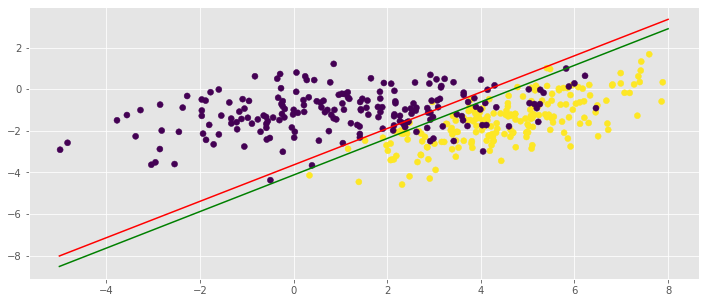

In [87]:
np.random.seed(0)

C1 = np.array([[0., -0.8], [1.5, 0.8]])
C2 = np.array([[1., -0.7], [2., 0.7]])
gauss1 = np.dot(np.random.randn(200, 2) + np.array([5, 3]), C1)
gauss2 = np.dot(np.random.randn(200, 2) + np.array([1.5, 0]), C2)

X = np.vstack([gauss1, gauss2])
y = np.r_[np.ones(200), np.zeros(200)].astype(int)

MyCls = MySGDClassifier(batch_generator, C=10000, coef=0.99, max_epoch=200, model_type='log_reg')
MyCls.fit(X, y)
plot_decision_boundary(MyCls)

for i in np.where(y == 0):
    y[i] = -1

MyCls = MySGDClassifier(batch_generator, C=10000, coef=0.99, max_epoch=200, model_type='lin_reg')
MyCls.fit(X, y)
plot_decision_boundary(MyCls)

plt.scatter(X[:,0], X[:,1], c=y)

Далее будем анализировать Ваш алгоритм. 
Для этих заданий используйте датасет ниже.

In [88]:
from sklearn.datasets import make_classification

In [89]:
X, y = make_classification(n_samples=100000, n_features=10, 
                           n_informative=4, n_redundant=0, 
                           random_state=123, class_sep=1.0,
                           n_clusters_per_class=1)

Покажите сходимости обеих регрессией на этом датасете: изобразите график  функции потерь, усредненной по $N$ шагам градиентого спуска, для разных `alpha` (размеров шага). Разные `alpha` расположите на одном графике. 

$N$ можно брать 10, 50, 100 и т.д. 

0.2258288294981288
0.21707525966392247
0.21337035972505938
0.21741638731367124


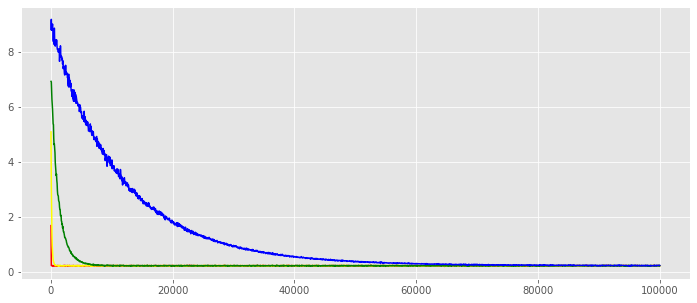

In [90]:
alpha = [(0.01, 'red'), (0.001, 'yellow'), (0.0001, 'green'), (0.00001, 'blue')]
N = 50
for a in alpha:
    MyClsLin = MySGDClassifier(batch_generator,
                               batch_size=20, alpha=a[0], coef=0.99, max_epoch=100, model_type='lin_reg')
    MyClsLin.fit(X, y)
    res = []
    params = []
    for i in range(0, len(MyClsLin.errors_log['loss']), N):
        params.append((i + N + i) / 2)
        res.append(np.mean(MyClsLin.errors_log['loss'][i: i+N]))
    plt.plot(params[:2000], res[:2000], color=a[1])
    print(res[-1])

0.5689199009456662
0.5680906137573252
0.5741409791107245
0.567502195042805


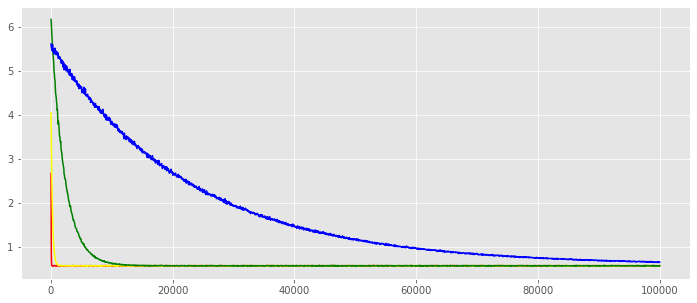

In [91]:
for a in alpha:
    MyClsLog = MySGDClassifier(batch_generator, batch_size=20, 
                               alpha=a[0], coef=0.99, max_epoch=100, model_type='log_reg')
    MyClsLog.fit(X, y)
    res = []
    params = []
    for i in range(0, len(MyClsLog.errors_log['loss']), N):
        params.append((i + N + i) / 2)
        res.append(np.mean(MyClsLog.errors_log['loss'][i: i+N]))
    plt.plot(params[:2000], res[:2000], color=a[1])
    print(res[-1])

Что Вы можете сказать про сходимость метода при различных `alpha`? Какое значение стоит выбирать для лучшей сходимости?

Изобразите график среднего значения весов для обеих регрессий в зависимости от коеф. регуляризации С из `np.logspace(3, -3, 10)` 

-0.0021502151748939158
-0.0007122156759683276
-0.03354042993474308
-0.037942721593926004
-0.023098995840449655
-0.0084575987278539
-0.002169928034377388
-0.0004784937252250441
-0.00012638325388004325
-2.4688855716771766e-05


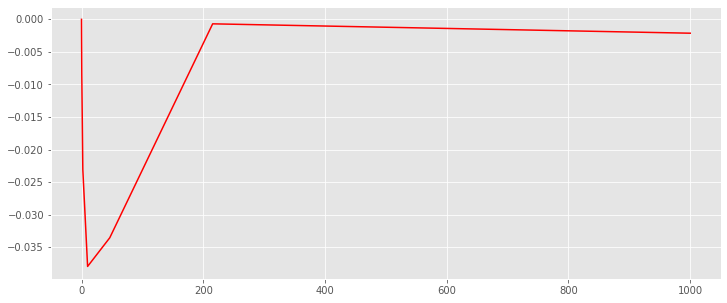

In [92]:
C_values = np.logspace(3, -3, 10)

#log regression

res_log = []
for a in C_values:
    MyClsLog = MySGDClassifier(batch_generator, batch_size=20,
                               alpha=0.0001, coef=0.99, C=a, max_epoch=100, model_type='log_reg')
    MyClsLog.fit(X, y)
    res_log.append(np.mean(MyClsLog.weights))
    print(res_log[-1])
plt.plot(C_values, res_log, color='red')

0.034140519973509906
0.03425759318110761
0.034785403162268934
0.03575460654468788
0.031756391482129304
0.016642894156890856
0.004550419362626165
0.001013243949463116
0.00021691332573852893
4.2095119245829204e-05


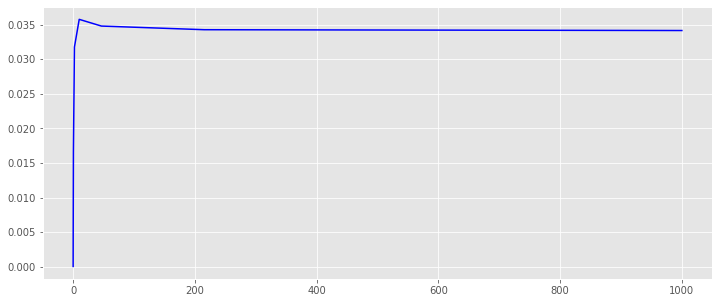

In [93]:
#linear regression
res_lin = []
for a in C_values:
    MyClsLin = MySGDClassifier(batch_generator, batch_size=20, 
                               alpha=0.0001, C=a, coef=0.99, max_epoch=100, model_type='lin_reg')
    MyClsLin.fit(X, y)
    res_lin.append(np.mean(MyClsLin.weights))
    print(res_lin[-1])
plt.plot(C_values, res_lin, color='blue')

Довольны ли Вы, насколько сильно уменьшились Ваши веса? 

# Боевое применение (4  балла)

**Защита данной части возможна только при преодолении в проекте бейзлайна Handmade baseline.**

Давайте применим модель на итоговом проекте! Датасет сделаем точно таким же образом, как было показано в project_overview.ipynb

Применим обе регрессии, подберем для них параметры и сравним качество. Может быть Вы еще одновременно с решением домашней работы подрастете на лидерборде!

In [3]:
doc_to_title = {}
with open('./docs_titles.tsv') as f:
    for num_line, line in enumerate(f):
        if num_line == 0:
            continue
        data = line.strip().split('\t', 1)
        doc_id = int(data[0])
        if len(data) == 1:
            title = ''
        else:
            title = data[1]
        doc_to_title[doc_id] = title
print (len(doc_to_title))

28026


In [4]:
import pandas as pd
train_data = pd.read_csv('./train_groups.csv')
traingroups_titledata = {}
for i in range(len(train_data)):
    new_doc = train_data.iloc[i]
    doc_group = new_doc['group_id']
    doc_id = new_doc['doc_id']
    target = new_doc['target']
    title = doc_to_title[doc_id]
    if doc_group not in traingroups_titledata:
        traingroups_titledata[doc_group] = []
    traingroups_titledata[doc_group].append((doc_id, title, target))

In [5]:
import numpy as np
import numpy as np
import re
import pymorphy2 as pym2

# функция для проверки соответствия слова какой-либо информативной единице
def pass_pattern(s):
    x = re.findall(r'[a-zа-я0-9]*\b', s)
    if x:
        return x[0] == s
    return False

y_train = []
X_train = []
groups_train = []
words_list = {}

#используем морфологический анализатор
MAnalyzer = pym2.MorphAnalyzer()

# множество словарь слов с их количеством в тектсе
multi_map = {}

# идем по всем группам и считаем сколько каких слов встречается во всех заголовках
# данные слова должны быть приведены к нормальной форме
for new_group in traingroups_titledata:
    docs = traingroups_titledata[new_group]
    for k, (doc_id, title, target_id) in enumerate(docs):
        words = set([MAnalyzer.normal_forms(x.lower().strip('.,?:!-()";*"'))[0]
                     if pass_pattern(x.lower().strip('.,?:!()";*"')) else ''
                     for x in title.strip().split()])
        if '' in words:
            words.remove('')
        words_list[doc_id] = words.copy()
        for x in words:
            if not x in multi_map:
                multi_map[x] = 1
            else:
                multi_map[x] += 1

# выбираем количество наиболее часто встречающихся слов, которые не являются информативными единицами
# выводим наиболее часто встречающиеся слова в выборке тайтлов
MAX_SPEC_WORDS = 11
popular_words_lst = list(multi_map.items())
popular_words_lst.sort(key=lambda x: x[1], reverse=True)
print(*popular_words_lst[:3 * MAX_SPEC_WORDS], sep='\n')

# добавляем еще несколько неинформативных единиц, которые не являются достаточно популярными, 
# чтобы попасть в топ-MAX_SPEC_WORDS
spec_words = {'о', 'из'}
for i in popular_words_lst[:MAX_SPEC_WORDS]:
    spec_words.add(i[0])
print(spec_words)

print('popular -- ok')

max_features = 25 # количество фичей для каждого тайтла в обучающей выборке
cnt = 1           # номер текущей группы 
for new_group in traingroups_titledata:
    docs = traingroups_titledata[new_group]
    for k, (doc_id, title, target_id) in enumerate(docs):
        groups_train.append(new_group)
        all_dist = []
        # приводим слова к нормальной форме и помещаем их в сет
        words = words_list[doc_id].copy()
        for j in range(0, len(docs)):
            if k == j:
                continue
            doc_id_j, title_j, target_j = docs[j]
            # приводим слова к нормальной форме и помещаем их в сет
            words_j = words_list[doc_id_j].copy()
            all_dist.append(len(words.intersection(words_j)))
        # если количество фичей недостаточно большое, то добавляем фиктивные (запонляем их нулями) 
        if len(all_dist) < max_features:
            all_dist.extend([0] * (max_features - len(all_dist)))
        X_train.append(sorted(all_dist, reverse=True)[0:max_features])
        y_train.append(target_id)
    print("{} -- ok".format(cnt))
    cnt += 1

X_train = np.array(X_train)
y_train = np.array(y_train)
groups_train = np.array(groups_train)
print (X_train.shape, y_train.shape, groups_train.shape)

('в', 2649)
('и', 2189)
('как', 2054)
('на', 1574)
('для', 871)
('с', 808)
('форум', 670)
('по', 573)
('что', 571)
('от', 496)
('скачать', 451)
('о', 440)
('из', 421)
('страница', 416)
('онлайн', 310)
('российский', 303)
('сделать', 295)
('рецепт', 294)
('новость', 284)
('бесплатно', 280)
('год', 277)
('хороший', 272)
('лечение', 272)
('домашний', 262)
('youtube', 246)
('видео', 239)
('условие', 237)
('сколько', 226)
('сервис', 225)
('ребёнок', 224)
('2', 224)
('средство', 220)
('фото', 215)
{'с', 'для', 'скачать', 'форум', 'как', 'на', 'из', 'в', 'по', 'что', 'от', 'о', 'и'}
popular -- ok
1 -- ok
2 -- ok
3 -- ok
4 -- ok
5 -- ok
6 -- ok
7 -- ok
8 -- ok
9 -- ok
10 -- ok
11 -- ok
12 -- ok
13 -- ok
14 -- ok
15 -- ok
16 -- ok
17 -- ok
18 -- ok
19 -- ok
20 -- ok
21 -- ok
22 -- ok
23 -- ok
24 -- ok
25 -- ok
26 -- ok
27 -- ok
28 -- ok
29 -- ok
30 -- ok
31 -- ok
32 -- ok
33 -- ok
34 -- ok
35 -- ok
36 -- ok
37 -- ok
38 -- ok
39 -- ok
40 -- ok
41 -- ok
42 -- ok
43 -- ok
44 -- ok
45 -- ok
46 -- o

Подберите размер батча для обучения. Линейная модель не должна учиться дольше нескольких минут. 

Не забывайте использовать скейлер!

In [6]:
from sklearn.metrics import f1_score
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import normalize
from sklearn.model_selection import train_test_split

0.17433077311424708
0.18709597880360077
0.16926949165619234
0.18130141963573518
0.1727222656892788


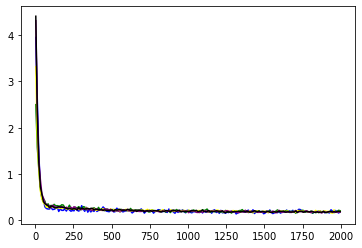

In [15]:
X_train = normalize(X_train, norm='l2', axis=1)

a = ['blue', 'green', 'yellow', 'purple', 'black']

for b_size in range(5, 26, 5):
    clf = MySGDClassifier(batch_generator=batch_generator, batch_size=b_size, C=100, alpha=0.01, 
                              coef=0.99, max_epoch=20, model_type='lin_reg')
   # LinearRegression()
    clf.fit(X_train, y_train)

    y_validation_predict = clf.predict(X_validation)
    params = []
    res = []
    for i in range(0, len(clf.errors_log['loss']), 10):
        params.append((i + 10 + i) / 2)
        res.append(np.mean(clf.errors_log['loss'][i: i+10]))
    plt.plot(params[:200], res[:200], color=a[(b_size-1)//5])
    print(res[-1])

In [ ]:
# берем batch_size = 15

Разбейте данные на обучение и валидацию. Подберите параметры C, alpha, max_epoch, model_type на валидации (Вы же помните, как правильно в этой задаче делать валидацию?)

In [44]:
X_train = normalize(X_train, norm='l2', axis=1)

1 -- ok
2 -- ok
3 -- ok
4 -- ok
5 -- ok
6 -- ok
7 -- ok
8 -- ok
0.5657468761075773 100.0


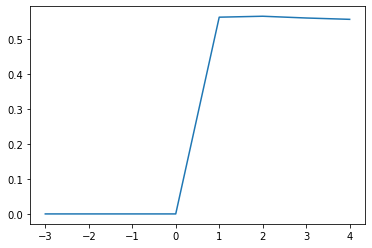

In [28]:
# подбираем C

C_values = [10.0 ** x for x in range(-3, 5)]
val = 0.3

cnt = 1
res = []
index = 0
for c in C_values:
    cur_res = []
    for _ in range(10):
        # делим выборку на валидационную и тренировочную
        X_subtrain, X_validation, y_subtrain, y_validation = train_test_split(X_train, y_train, test_size = 0.3)

        clf = MySGDClassifier(batch_generator=batch_generator, batch_size=15, C=c, alpha=0.001, 
                              coef=0.99, max_epoch=10, model_type='lin_reg')
        clf.fit(X_subtrain, y_subtrain)
        y_validation_predict = clf.predict(X_validation)

        for i in np.where(y_validation_predict >= val):
            y_validation_predict[i] = 1
        for i in np.where(y_validation_predict < val):
            y_validation_predict[i] = 0

        cur_res.append(f1_score(y_validation, y_validation_predict))
    
    print("{} -- ok".format(cnt))
    cnt += 1
    # находим среднее значение
    res.append(sum(cur_res) / len(cur_res))
    if res[-1] > res[index]:
        index = len(res) - 1

plt.plot(range(-3, 5), res)
print(res[index], C_values[index])

1 -- ok
2 -- ok
3 -- ok
4 -- ok
5 -- ok
0.5696408888037362 0.1


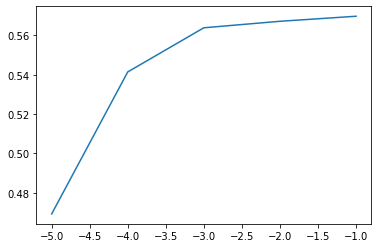

In [30]:
# подбираем alpha

alpha_values = [10.0 ** x for x in range(-5, 0)]
val = 0.3

cnt = 1
res = []
index = 0
for al in alpha_values:
    cur_res = []
    for _ in range(10):
        # делим выборку на валидационную и тренировочную
        X_subtrain, X_validation, y_subtrain, y_validation = train_test_split(X_train, y_train, test_size = 0.3)

        clf = MySGDClassifier(batch_generator=batch_generator, batch_size=15, C=100, alpha=al, 
                              coef=0.99, max_epoch=10, model_type='lin_reg')
        clf.fit(X_subtrain, y_subtrain)
        y_validation_predict = clf.predict(X_validation)

        for i in np.where(y_validation_predict >= val):
            y_validation_predict[i] = 1
        for i in np.where(y_validation_predict < val):
            y_validation_predict[i] = 0

        cur_res.append(f1_score(y_validation, y_validation_predict))
    
    print("{} -- ok".format(cnt))
    cnt += 1
    # находим среднее значение
    res.append(sum(cur_res) / len(cur_res))
    if res[-1] > res[index]:
        index = len(res) - 1

plt.plot(range(-5, 0), res)
print(res[index], alpha_values[index])

1 -- ok
2 -- ok
3 -- ok
4 -- ok
5 -- ok
0.5806692214533999 10


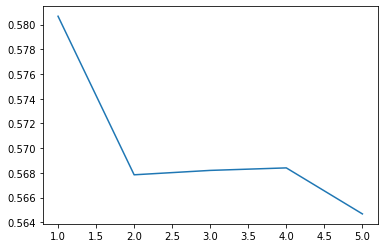

In [41]:
# подбираем max_epoch
# подбираем C

epoch = [10 * x for x in range(1, 6)]
val = 0.3

cnt = 1
res = []
index = 0
for ep in epoch: # x - пороговое значение для KNeighborsRegressor
    cur_res = []
    for _ in range(5):
        # делим выборку на валидационную и тренировочную
        X_subtrain, X_validation, y_subtrain, y_validation = train_test_split(X_train, y_train, test_size = 0.3)

        clf = MySGDClassifier(batch_generator=batch_generator, batch_size=15, C=100, alpha=0.1, 
                              coef=0.99, max_epoch=ep, model_type='lin_reg')
        clf.fit(X_subtrain, y_subtrain)
        y_validation_predict = clf.predict(X_validation)

        for i in np.where(y_validation_predict >= val):
            y_validation_predict[i] = 1
        for i in np.where(y_validation_predict < val):
            y_validation_predict[i] = 0

        cur_res.append(f1_score(y_validation, y_validation_predict))
    
    print("{} -- ok".format(cnt))
    cnt += 1
    # находим среднее значение
    res.append(sum(cur_res) / len(cur_res))
    if res[-1] > res[index]:
        index = len(res) - 1

plt.plot(range(1, 6), res)
print(res[index], epoch[index])

In [42]:
lin_threshold = 0.3
log_threshold = -1

cnt = 1
log_res = []
lin_res = []
for _ in range(10):
    # делим выборку на валидационную и тренировочную
    X_subtrain, X_validation, y_subtrain, y_validation = train_test_split(X_train, y_train, test_size = 0.3)

    LogClf = MySGDClassifier(batch_generator=batch_generator, batch_size=15, C=100, alpha=0.1, 
                          coef=0.99, max_epoch=10, model_type='log_reg', log_threshold=log_threshold)
    LinClf =  MySGDClassifier(batch_generator=batch_generator, batch_size=15, C=100, alpha=0.1, 
                          coef=0.99, max_epoch=10)
    LogClf.fit(X_subtrain, y_subtrain)
    LinClf.fit(X_subtrain, y_subtrain)

    # Log
    y_validation_predict = LogClf.predict(X_validation)
    log_res.append(f1_score(y_validation, y_validation_predict))
        
    # Linear
    y_validation_predict = LinClf.predict(X_validation)
    for i in np.where(y_validation_predict >= val):
        y_validation_predict[i] = 1
    for i in np.where(y_validation_predict < val):
        y_validation_predict[i] = 0

    lin_res.append(f1_score(y_validation, y_validation_predict))
    print("{} -- ok".format(_))
    
print(sum(log_res) / len(log_res))
print(sum(lin_res) / len(lin_res))

0 -- ok
1 -- ok
2 -- ok
3 -- ok
4 -- ok
5 -- ok
6 -- ok
7 -- ok
8 -- ok
9 -- ok
0.5350806258227997
0.5728445505729882


Подберите порог линейной модели, по достижении которого, Вы будете относить объект к классу 1. Вспомните, какую метрику мы оптимизируем в соревновании.  Как тогда правильно подобрать порог?

1 -- ok
2 -- ok
3 -- ok
4 -- ok
5 -- ok
6 -- ok
7 -- ok
8 -- ok
9 -- ok
10 -- ok
11 -- ok
12 -- ok
13 -- ok
14 -- ok
15 -- ok
16 -- ok
17 -- ok
18 -- ok
19 -- ok
20 -- ok
21 -- ok
22 -- ok
23 -- ok
24 -- ok
25 -- ok
0.5733257586907028 0.24583333333333332


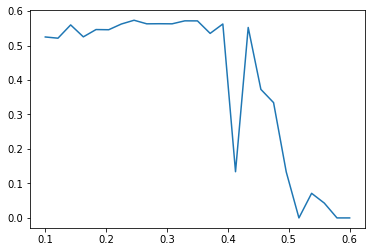

In [43]:
# threshold for lin

cnt = 1
val = np.linspace(0.1, 0.6, 25)
res = []
index = 0
for x in val: # x - пороговое значение для KNeighborsRegressor
    cur_res = []
    for _ in range(3):
        X_subtrain, X_validation, y_subtrain, y_validation = train_test_split(X_train, y_train, test_size = 0.3)

        clf = MySGDClassifier(batch_generator=batch_generator, batch_size=15, C=100, alpha=0.1, 
                              coef=0.99, max_epoch=10, model_type='lin_reg')
        clf.fit(X_subtrain, y_subtrain)

        y_validation_predict = clf.predict(X_validation)

        # решаем, к какому классу принадлежит объект в зависимости от значения регрессора
        for i in np.where(y_validation_predict >= x):
            y_validation_predict[i] = 1
        for i in np.where(y_validation_predict < x):
            y_validation_predict[i] = 0
        # сохраняем значения f1 score
        cur_res.append(f1_score(y_validation, y_validation_predict))
    
    print("{} -- ok".format(cnt))
    cnt += 1
    # находим среднее значение
    res.append(sum(cur_res) / len(cur_res))
    if res[-1] > res[index]:
        index = len(res) - 1

plt.plot(val, res)
print(res[index], val[index])

1 -- ok
2 -- ok
3 -- ok
4 -- ok
5 -- ok
6 -- ok
7 -- ok
8 -- ok
9 -- ok
10 -- ok
11 -- ok
12 -- ok
13 -- ok
14 -- ok
15 -- ok
16 -- ok
17 -- ok
18 -- ok
19 -- ok
20 -- ok
21 -- ok
22 -- ok
23 -- ok
24 -- ok
25 -- ok
0.5768075252924955 -0.5833333333333335


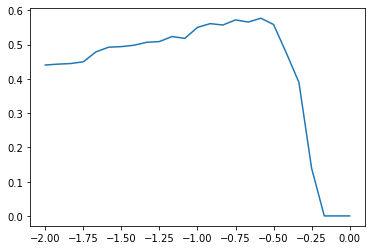

In [46]:
# threshold for log

cnt = 1
val = np.linspace(-2, 0, 25)
res = []
index = 0
for x in val: # x - пороговое значение для KNeighborsRegressor
    cur_res = []
    for _ in range(3):
        X_subtrain, X_validation, y_subtrain, y_validation = train_test_split(X_train, y_train, test_size = 0.3)

        clf = MySGDClassifier(batch_generator=batch_generator, batch_size=15, C=100, alpha=0.1, 
                              coef=0.99, max_epoch=10, model_type='log_reg', log_threshold=x)
        clf.fit(X_subtrain, y_subtrain)

        y_validation_predict = clf.predict(X_validation)

        # сохраняем значения f1 score
        cur_res.append(f1_score(y_validation, y_validation_predict))
    
    print("{} -- ok".format(cnt))
    cnt += 1
    # находим среднее значение
    res.append(sum(cur_res) / len(cur_res))
    if res[-1] > res[index]:
        index = len(res) - 1

plt.plot(val, res)
print(res[index], val[index])

С лучшими параметрами на валидации сделайте предсказание на тестовом множестве, отправьте его на проверку на платформу kaggle. Убедитесь, что Вы смогли побить public score первого бейзлайна.

** При сдаче домашки Вам необходимо кроме ссылки на ноутбук показать Ваш ник на kaggle, под которым Вы залили решение, которое побило Handmade baseline. **

In [111]:
test_data = pd.read_csv('test_groups.csv')
test_data.head()

,pair_id,group_id,doc_id
0,11691,130,6710
1,11692,130,4030
2,11693,130,5561
3,11694,130,4055
4,11695,130,4247


In [48]:
#просто копипастим и загоняем тестовую выборку в test_data так же кк train_data
testgroups_titledata = {}
for i in range(len(test_data)):
    new_doc = test_data.iloc[i]
    doc_group = new_doc['group_id']
    doc_id = new_doc['doc_id']
    title = doc_to_title[doc_id]
    if doc_group not in testgroups_titledata:
        testgroups_titledata[doc_group] = []
    testgroups_titledata[doc_group].append((doc_id, title))

def pass_pattern(s):
    x = re.findall(r'[a-zа-я0-9]*\b', s)
    if x:
        return x[0] == s
    return False
    
# анализатор слов
MAnalyzer = pym2.MorphAnalyzer()

# множество словарь слов с их количеством в тектсе
multi_map = {}

words_list = {}

for new_group in testgroups_titledata:
    docs = testgroups_titledata[new_group]
    for k, (doc_id, title) in enumerate(docs):
        words = set([MAnalyzer.normal_forms(x.lower().strip('.,?:!-()";*"'))[0]
                     if pass_pattern(x.lower().strip('.,?:!()";*"')) else ''
                     for x in title.strip().split()])
        if '' in words:
            words.remove('')
        words_list[doc_id] = words.copy()
        for x in words:
            if not x in multi_map:
                multi_map[x] = 1
            else:
                multi_map[x] += 1

# выбираем количество наиболее часто встречающихся слов, которые не являются информативными единицами
# выводим наиболее часто встречающиеся слова в выборке тайтлов
MAX_SPEC_WORDS = 11
popular_words_lst = list(multi_map.items())
popular_words_lst.sort(key=lambda x: x[1], reverse=True)
print(*popular_words_lst[:3 * MAX_SPEC_WORDS], sep='\n')

# добавляем еще несколько неинформативных единиц, которые не являются достаточно популярными, 
# чтобы попасть в топ-MAX_SPEC_WORDS
spec_words = {'от', 'из', 'к', 'за'}
for i in popular_words_lst[:MAX_SPEC_WORDS]:
    spec_words.add(i[0])
print(spec_words)
print('popular -- ok')

max_features = 30
X_test = []
groups_test = []
cnt = 1
for new_group in testgroups_titledata:
    docs = testgroups_titledata[new_group]
    for k, (doc_id, title) in enumerate(docs):
        groups_test.append(new_group)
        all_dist = []
        # приводим слова к нормальной форме и помещаем их в сет
        words = words_list[doc_id].copy()
        for j in range(0, len(docs)):
            if k == j:
                continue
            doc_id_j, title_j = docs[j]
            words_j = words_list[doc_id_j].copy()
            all_dist.append(len(words.intersection(words_j)))

        if len(all_dist) < max_features:
            all_dist.extend([0] * (max_features - len(all_dist)))
        X_test.append(sorted(all_dist, reverse=True)[0:max_features])
    print("{} -- ok".format(cnt))
    cnt += 1
X_test = np.array(X_test)
groups_test = np.array(groups_test)

('в', 3384)
('и', 3055)
('как', 2892)
('на', 2188)
('с', 1091)
('для', 1065)
('форум', 1001)
('по', 812)
('что', 704)
('о', 667)
('страница', 610)
('скачать', 572)
('от', 557)
('онлайн', 518)
('бесплатно', 515)
('российский', 494)
('из', 426)
('новость', 426)
('сервис', 424)
('к', 413)
('вконтакте', 412)
('liveinternet', 400)
('2', 398)
('за', 366)
('чем', 352)
('ли', 338)
('смотреть', 334)
('хороший', 323)
('год', 312)
('вопрос', 306)
('цена', 305)
('youtube', 299)
('домашний', 297)
{'о', 'с', 'для', 'как', 'на', 'из', 'страница', 'к', 'в', 'по', 'что', 'от', 'форум', 'за', 'и'}
popular -- ok
1 -- ok
2 -- ok
3 -- ok
4 -- ok
5 -- ok
6 -- ok
7 -- ok
8 -- ok
9 -- ok
10 -- ok
11 -- ok
12 -- ok
13 -- ok
14 -- ok
15 -- ok
16 -- ok
17 -- ok
18 -- ok
19 -- ok
20 -- ok
21 -- ok
22 -- ok
23 -- ok
24 -- ok
25 -- ok
26 -- ok
27 -- ok
28 -- ok
29 -- ok
30 -- ok
31 -- ok
32 -- ok
33 -- ok
34 -- ok
35 -- ok
36 -- ok
37 -- ok
38 -- ok
39 -- ok
40 -- ok
41 -- ok
42 -- ok
43 -- ok
44 -- ok
45 -- ok
46 

In [108]:
lin_clf = MySGDClassifier(batch_generator=batch_generator, batch_size=15, C=100, alpha=0.5, 
                              coef=0.95, max_epoch=10, model_type='lin_reg')
lin_clf.fit(X_train, y_train)

MySGDClassifier(C=100, alpha=0.2993684696191893,
                batch_generator=<function batch_generator at 0x7f00269a10e0>,
                batch_size=15, coef=0.95)

In [109]:
y_pred = lin_clf.predict(X_test)
for i in np.where(y_pred >= 0.3):
    y_pred[i] = 1
for i in np.where(y_pred < 0.3):
    y_pred[i] = 0
y_pred = np.array(y_pred, dtype=int)

In [112]:
#добавляем столбец target
test_data['target'] = y_pred

#удаляем ненужные столбцы
test_data.drop(['group_id', 'doc_id'], axis='columns', inplace=True)

#сохраняем наш датафрейм в файл, который загружаем в kaggle
test_data.to_csv('result.csv', index=False)

In [ ]:
# результат 0.55273 (private)
# результат 0.55451 (open)

# Фидбек (бесценно)

* Какие аспекты обучения линейных моделей Вам показались непонятными? Какое место стоит дополнительно объяснить?

***Ваше ответ здесь***

* Здесь Вы можете оставить отзыв о этой домашней работе или о всем курсе.   

*** ВАШ ОТЗЫВ ЗДЕСЬ***